### Importing Necessary Libraries

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

### Loading Data into DataFrame

In [3]:
data = load_iris()

In [4]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(data.data,columns = data.feature_names)

In [6]:
df["target"] = data.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train Test Split

In [10]:
x_tr,x_t,y_tr,y_t = train_test_split(df.drop("target",axis=1),df.target,random_state=10)

### Hyper-Parameter Tuning

In [11]:
grid = GridSearchCV(RandomForestClassifier(),param_grid={"n_estimators":[10,30,50,100,200,300]},cv=5)
grid.fit(x_tr,y_tr)
grid.score(x_t,y_t)
grid.best_score_,grid.best_params_

(0.9466403162055336, {'n_estimators': 30})

In [12]:
grid = GridSearchCV(DecisionTreeClassifier(),{},cv=5)
grid.fit(x_tr,y_tr)
grid.score(x_t,y_t)
grid.best_score_,grid.best_params_

(0.9197628458498024, {})

### Performing Primary and Secondary EDA

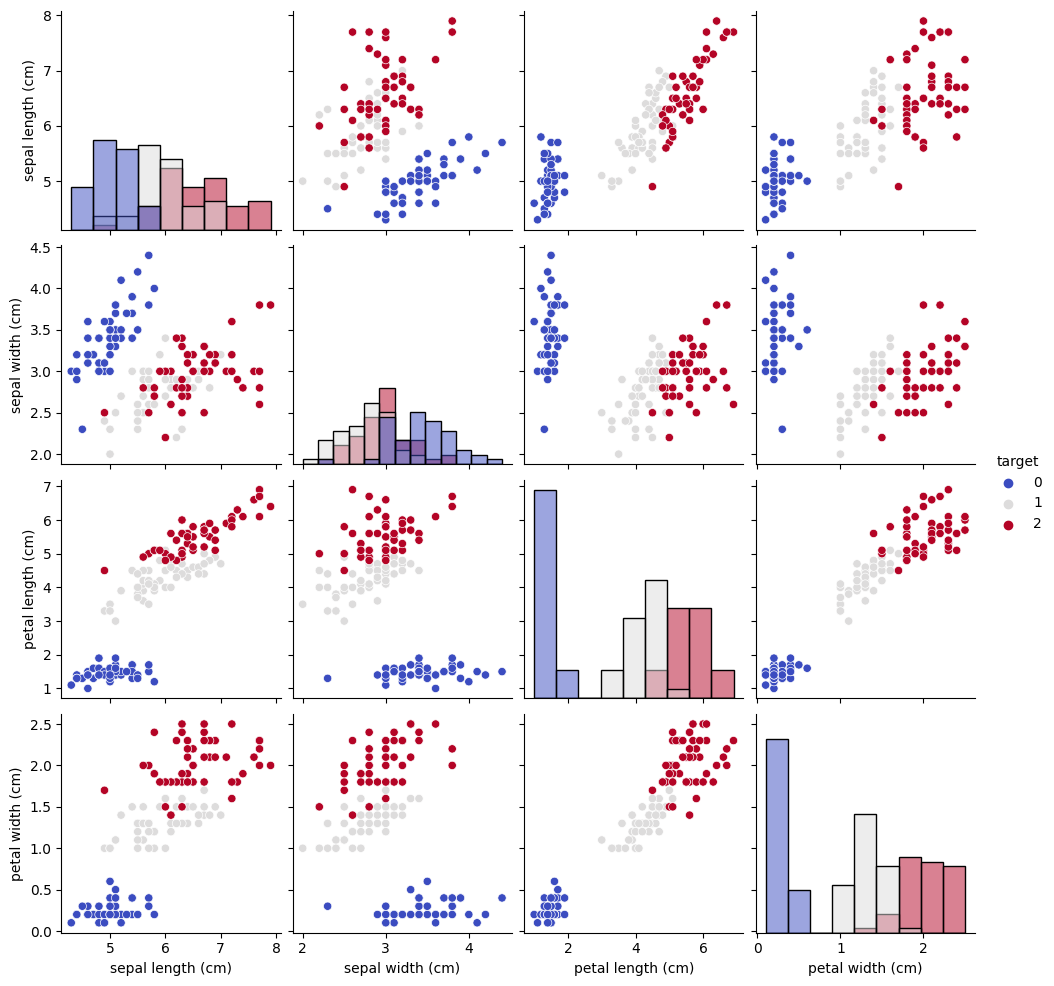

In [18]:
sns.pairplot(df,hue="target",palette="coolwarm",diag_kind="hist")

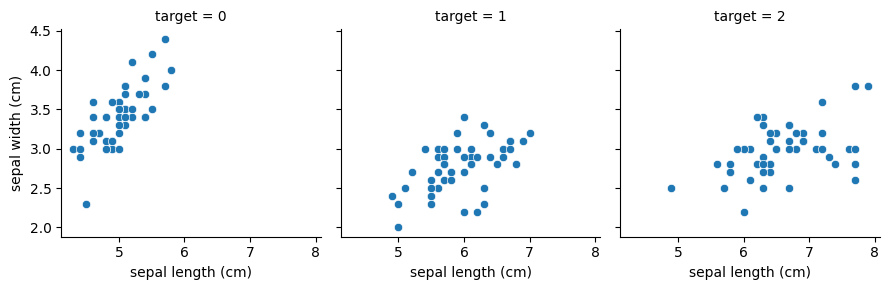

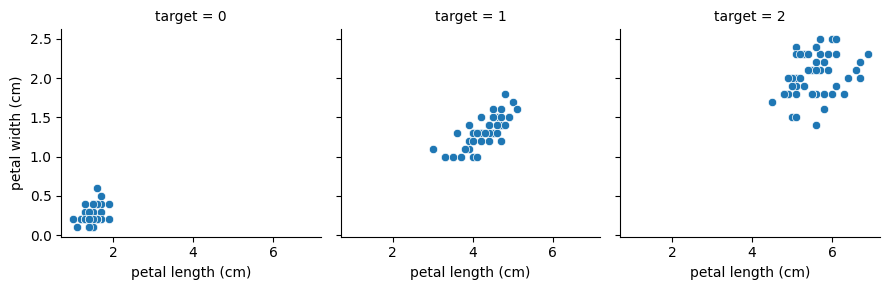

In [42]:
f = sns.FacetGrid(df,col="target",palette="coolwarm")
f.map(sns.scatterplot,"sepal length (cm)","sepal width (cm)")
k = sns.FacetGrid(df,col="target",palette="coolwarm")
k.map(sns.scatterplot,"petal length (cm)","petal width (cm)")

### Finalising the best parameters for the model

In [38]:
grid = GridSearchCV(SVC(),param_grid={"C":[1.0,10,15,20,30,50,0.1,0.001],"gamma":['scale',1,10,0.001,30,20]},cv=5)
grid.fit(x_tr,y_tr)
grid.best_params_

{'C': 10, 'gamma': 'scale'}

In [39]:
pre = grid.predict(x_t)

### Model Evaluation

In [40]:
grid.score(x_t,y_t)

1.0

<Axes: >

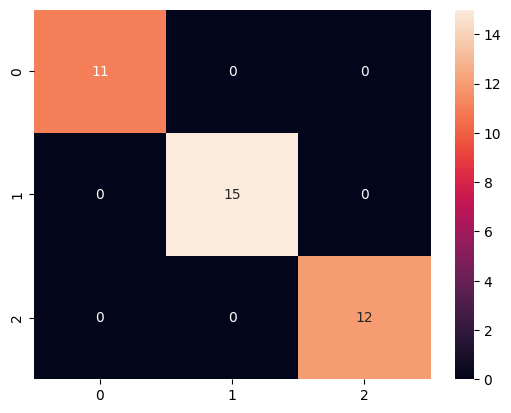

In [41]:
sns.heatmap(confusion_matrix(y_t,pre),annot=True)

In [34]:
print(classification_report(y_t,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

